# Multi-class Classification Practice

In [ ]:
import numpy as np
np.random.seed(1234)

## Load Data

In [ ]:
from tensorflow.keras.datasets import reuters

(train_input, train_target), (test_input, test_target) = reuters.load_data(num_words=10000)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

2113536/2110848 [==============================] - 0s 0us/step
(8982,) (8982,)
(2246,) (2246,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(train_input[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
print(train_target[0])

3


## Token and Index

In [ ]:
WordIndex_dict = reuters.get_word_index()
IndexWord_dict = dict([(v, k) for (k, v) in WordIndex_dict.items()])
WordIndex_dict = dict([(k, v) for (k, v) in WordIndex_dict.items()])
IndexWord_dict

557056/550378 [==============================] - 0s 0us/step


{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [ ]:
decoded_review = ' '.join([IndexWord_dict.get(each_idx - 3, '.') for each_idx in train_input[0]])
print(decoded_review)

. . . said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## One Hot Encoding

In [ ]:
def ApplyOneHotEncoding(docs, dim=10000):
    result_arr = np.zeros((len(docs), dim))
    for idx, doc in enumerate(docs):
        result_arr[idx, doc] = 1
    return result_arr

In [ ]:
train_input = ApplyOneHotEncoding(train_input)
test_input = ApplyOneHotEncoding(test_input)

print(train_input.shape)
print(test_input.shape)

(8982, 10000)
(2246, 10000)


In [ ]:
train_input[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Target Categorical Processing

In [ ]:
from tensorflow.keras.utils import to_categorical

train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

print(train_target.shape)
print(test_target.shape)

(8982, 46)
(2246, 46)


In [ ]:
train_target[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model Definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


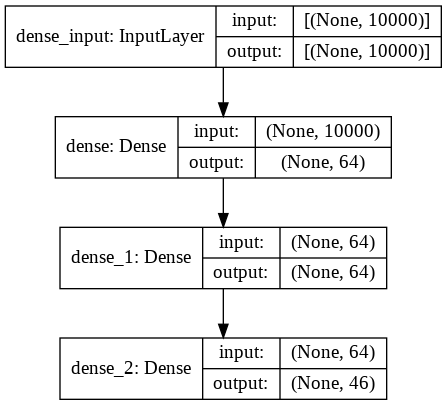

In [ ]:
# Windows에서는 잘 안되니, CoLab에서 실행해야 함
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
train_input = train_input[1000:]
val_input = train_input[:1000]
train_target = train_target[1000:]
val_target = train_target[:1000]

print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)

(7982, 10000) (7982, 46)
(1000, 10000) (1000, 46)


In [ ]:
history = model.fit(
    train_input,
    train_target,
    epochs=20,
    batch_size=512,
    validation_data=(val_input, val_target)
)

Epoch 1/20
16/16 [==============================] - 4s 26ms/step - loss: 2.6912 - accuracy: 0.4817 - val_loss: 1.6692 - val_accuracy: 0.6970
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4065 - accuracy: 0.7162 - val_loss: 1.1539 - val_accuracy: 0.7570
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0308 - accuracy: 0.7823 - val_loss: 0.8830 - val_accuracy: 0.8090
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8055 - accuracy: 0.8282 - val_loss: 0.6849 - val_accuracy: 0.8520
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.8631 - val_loss: 0.5377 - val_accuracy: 0.8910
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5079 - accuracy: 0.8943 - val_loss: 0.4230 - val_accuracy: 0.9130
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4050 - accuracy: 0.9166 - val_loss: 0.3586 - val_accuracy: 0.9240
Epoch 8/20
16

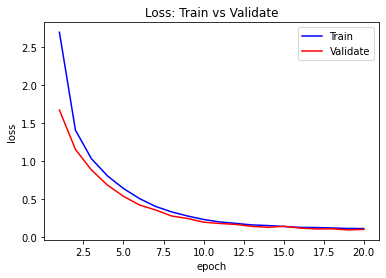

''

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_list = range(1, len(train_loss) + 1, 1)

plt.plot(epoch_list, train_loss, 'blue', label='Train')
plt.plot(epoch_list, val_loss, 'red', label='Validate')

plt.title('Loss: Train vs Validate')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()
;

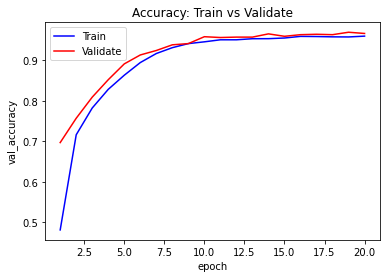

''

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch_list = range(1, len(train_loss) + 1, 1)

plt.plot(epoch_list, train_acc, 'blue', label='Train')
plt.plot(epoch_list, val_acc, 'red', label='Validate')

plt.title('Accuracy: Train vs Validate')
plt.xlabel('epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()
;

Overfitting을 줄이기 위해 Epoch을 9로 줄이자!

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(traintrain_input, traintrain_target, epochs=9, batch_size=512,
         validation_data=(trainval_input, trainval_target))

Epoch 1/9
16/16 [==============================] - 1s 57ms/step - loss: 3.1373 - acc: 0.4137 - val_loss: 1.7715 - val_acc: 0.6060
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.5656 - acc: 0.6558 - val_loss: 1.3494 - val_acc: 0.7040
Epoch 3/9
16/16 [==============================] - 0s 31ms/step - loss: 1.1241 - acc: 0.7634 - val_loss: 1.1680 - val_acc: 0.7470
Epoch 4/9
16/16 [==============================] - 1s 32ms/step - loss: 0.8910 - acc: 0.8069 - val_loss: 1.0700 - val_acc: 0.7680
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.7117 - acc: 0.8471 - val_loss: 1.0060 - val_acc: 0.7720
Epoch 6/9
16/16 [==============================] - 1s 33ms/step - loss: 0.5782 - acc: 0.8825 - val_loss: 0.9400 - val_acc: 0.7930
Epoch 7/9
16/16 [==============================] - 1s 33ms/step - loss: 0.4232 - acc: 0.9153 - val_loss: 0.9235 - val_acc: 0.8060
Epoch 8/9
16/16 [==============================] - 1s 32ms/step - loss: 0.3480 - acc: 0.92

In [ ]:
import numpy as np

test_loss, test_acc = model.evaluate(test_input, test_target)
print('Loss:', np.round(test_loss), 4)
print('Accuracy:', np.round(test_acc), 4)

71/71 [==============================] - 0s 3ms/step - loss: 1.2203 - accuracy: 0.7881
Loss: 1.0 4
Accuracy: 1.0 4


새로운 데이터에 대해 예측하기

In [ ]:
test_pred = model.predict(test_input)
print(test_pred[0].shape)

(46,)


In [ ]:
print(np.sum(test_pred[0]))

1.0000001


In [ ]:
print(np.argmax(test_pred[0]))
print(np.argmax(test_target[0]))

3
3
